## **Extracción de Datos y Creación de Base de Datos** 

In [1]:
# Libreria para la base de datos
import sqlite3

# Crear y conectarse a la base de datos inicial
con = sqlite3.connect("../data_final/raw/wine_store.db")

### **Primer Scraping:** Obtener información primaria de los productos de la CAV

In [2]:
# Librerias para la web scrapping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as soup

# scrapping de la pagina: https://cav.cl/tienda
data_wine = []
driver = webdriver.Chrome()
for x in range(50):
    url = f"https://cav.cl/tienda?q=&hPP=20&idx=products&p={x}&fR%5Bfamily.name%5D%5B0%5D=Vinos&is_v=1"
    driver.get(url)
    driver.implicitly_wait(3)
    try:
        age_verification_popup = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'modalAge'))
        )
        yes_button = age_verification_popup.find_element(By.XPATH, "//button[contains(., 'SI')]")
        yes_button.click()
    except:
        pass
    
    page_soup = soup(driver.page_source, 'html.parser')
    
    info = []
    for article in page_soup.find_all("article"):
        id = article.attrs.get("data-id")
        sku = article.attrs.get("data-sku")
        name = article.attrs.get("data-name")
        brand = article.attrs.get("data-brand")
        category = article.attrs.get("data-category")
        variant = article.attrs.get("data-variant")
        ref = article.find("a").attrs.get("href")
        info.append([id, sku, name, brand, category, variant, ref])
    
    data_wine.append(info)
    
driver.quit()

In [3]:
# Redimensionar la data extraida
rs_data_wine = []

for sublist in data_wine:
    rs_data_wine.extend(sublist)
    
# primera vista de los datos
rs_data_wine

[['13665',
  '30366',
  'Pack Espumante La Capitana Chardonnay + Rose - Brut',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-espumante-la-capitana-chardonnay-rose-brut-30366'],
 ['14297',
  '31486',
  'Pack Centellino + Vino Viña Marty Kalak Ensamblaje Tinto 2019',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-centellino-vino-vina-marty-kalak-ensamblaje-tinto-2019-31486'],
 ['14292',
  '31481',
  'Pack Decantandor U Joes + Vino Viña Andes Plateau Andesita Cs',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-decantandor-u-joes-vino-vina-andes-plateau-andesita-cs-31481'],
 ['14291',
  '31480',
  'Pack Copas Riedel Overture + Vino Clos De Luz Massal 1945',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-copas-riedel-overture-vino-clos-de-luz-massal-1945-31480'],
 ['13733',
  '30491',
  'Pack Errazuriz Don Maximiano Cosechas His

In [4]:
# Importar libreria para crear dataframe
import pandas as pd

# Crear un Data Frame de la data extraida
productos_df = pd.DataFrame(rs_data_wine, columns=['id', 'sku', 'nombre', 'marca', 'categoria', 'variedad', 'url_ref'])
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,13665,30366,Pack Espumante La Capitana Chardonnay + Rose -...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-espumante-la-capitana-ch...
1,14297,31486,Pack Centellino + Vino Viña Marty Kalak Ensamb...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-centellino-vino-vina-mar...
2,14292,31481,Pack Decantandor U Joes + Vino Viña Andes Plat...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-decantandor-u-joes-vino-...
3,14291,31480,Pack Copas Riedel Overture + Vino Clos De Luz ...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-copas-riedel-overture-vi...
4,13733,30491,Pack Errazuriz Don Maximiano Cosechas Historic...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-errazuriz-don-maximiano-...
...,...,...,...,...,...,...,...
2195,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,/tienda/producto/arboleda-pinot-noir-2021-30665
2196,13568,30170,Arboleda Chardonnay 2021,Arboleda,Blanco,Chardonnay,/tienda/producto/arboleda-chardonnay-2021-30170
2197,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,/tienda/producto/arboleda-chardonnay-2020-29011
2198,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2020...


In [5]:
# Eliminar duplicados
productos_df.drop_duplicates("id", inplace=True)
productos_df


,id,sku,nombre,marca,categoria,variedad,url_ref
0,13665,30366,Pack Espumante La Capitana Chardonnay + Rose -...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-espumante-la-capitana-ch...
1,14297,31486,Pack Centellino + Vino Viña Marty Kalak Ensamb...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-centellino-vino-vina-mar...
2,14292,31481,Pack Decantandor U Joes + Vino Viña Andes Plat...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-decantandor-u-joes-vino-...
3,14291,31480,Pack Copas Riedel Overture + Vino Clos De Luz ...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-copas-riedel-overture-vi...
4,13733,30491,Pack Errazuriz Don Maximiano Cosechas Historic...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-errazuriz-don-maximiano-...
...,...,...,...,...,...,...,...
2193,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,/tienda/producto/cousino-macul-finis-terrae-en...
2195,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,/tienda/producto/arboleda-pinot-noir-2021-30665
2197,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,/tienda/producto/arboleda-chardonnay-2020-29011
2198,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2020...


In [6]:
# Eliminar los productos sin información en las columnas marca y categoria
productos_df = productos_df.drop(productos_df[(productos_df["marca"] == "Sin Informacion") & (productos_df["categoria"] == "Sin Informacion") & (productos_df["variedad"] == "Sin Informacion")].index )
productos_df.reset_index(inplace=True)
productos_df

,index,id,sku,nombre,marca,categoria,variedad,url_ref
0,8,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,/tienda/producto/almaviva-epu-2019-en-estuche-...
1,9,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,/tienda/producto/miguel-torres-manso-de-velasc...
2,10,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,/tienda/producto/bisquertt-tralca-2015-26142
3,11,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,/tienda/producto/concha-y-toro-terrunyo-carmen...
4,12,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,/tienda/producto/la-rosa-cornellana-volcano-se...
...,...,...,...,...,...,...,...,...
993,2193,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,/tienda/producto/cousino-macul-finis-terrae-en...
994,2195,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,/tienda/producto/arboleda-pinot-noir-2021-30665
995,2197,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,/tienda/producto/arboleda-chardonnay-2020-29011
996,2198,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2020...


In [7]:
# Eliminar la columna "index" y completar la información de la columna "url_ref"
productos_df.drop(["index"], axis=1, inplace=True)
productos_df['url_ref'] = 'https://cav.cl/' + productos_df['url_ref'].astype(str)
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,https://cav.cl//tienda/producto/almaviva-epu-2...
1,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,https://cav.cl//tienda/producto/miguel-torres-...
2,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,https://cav.cl//tienda/producto/bisquertt-tral...
3,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,https://cav.cl//tienda/producto/concha-y-toro-...
4,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,https://cav.cl//tienda/producto/la-rosa-cornel...
...,...,...,...,...,...,...,...
993,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,https://cav.cl//tienda/producto/cousino-macul-...
994,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,https://cav.cl//tienda/producto/arboleda-pinot...
995,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,https://cav.cl//tienda/producto/arboleda-chard...
996,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,https://cav.cl//tienda/producto/arboleda-sauvi...


In [8]:
# Infomación del dataframe de productos
productos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         998 non-null    object
 1   sku        998 non-null    object
 2   nombre     998 non-null    object
 3   marca      998 non-null    object
 4   categoria  998 non-null    object
 5   variedad   998 non-null    object
 6   url_ref    998 non-null    object
dtypes: object(7)
memory usage: 54.7+ KB


**Nota:** En esta primera extracción se logra obtener los datos de 998 vinos desde la pagina de la tienda de la CAV, con la información de la url para poder realizar un segundo scraping para obtener más información de los vinos.

In [9]:
# Crear la tabla productos en la base de datos
con.execute(
    """
    CREATE TABLE IF NOT EXISTS productos(
        id INT PRIMARY KEY NOT NULL,
        sku INT NOT NULL,
        nombre VARCHAR(100000),
        marca VARCHAR(255),
        categoria VARCHAR(255),
        variedad VARCHAR(1000),
        url_ref VARCHAR(1000000)
    );
    """
)

In [10]:
# Guardar los valores del dataframe en la tabla creada
productos_df.to_sql("productos", con=con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

### **Segundo Scraping:** Obtener más caracteristicas del producto

In [11]:
# Leer la tabla productos como dataframe
con = sqlite3.connect("../data_final/raw/wine_store.db")
select_productos =  "SELECT * FROM productos;"
productos_df = pd.read_sql_query(select_productos, con)

# Leer las URL desde productos_df
url_list = []
for index, row in productos_df.iterrows():
    url = row["url_ref"]
    url_list.append(url)

url_list

['https://cav.cl//tienda/producto/almaviva-epu-2019-en-estuche-30972',
 'https://cav.cl//tienda/producto/miguel-torres-manso-de-velasco-2019-30348',
 'https://cav.cl//tienda/producto/bisquertt-tralca-2015-26142',
 'https://cav.cl//tienda/producto/concha-y-toro-terrunyo-carmenere-2021-31586',
 'https://cav.cl//tienda/producto/la-rosa-cornellana-volcano-sedimentario-carmenere-2020-30744',
 'https://cav.cl//tienda/producto/la-rosa-cornellana-volcano-sedimentario-cabernet-franc-2020-30743',
 'https://cav.cl//tienda/producto/aresti-codigo-de-familia-380-2014-28978',
 'https://cav.cl//tienda/producto/valle-secreto-profundo-ensamblaje-tinto-2017-29662',
 'https://cav.cl//tienda/producto/chateau-los-boldos-amalia-blend-2017-30735',
 'https://cav.cl//tienda/producto/valdivieso-caballo-loco-grand-cru-blanc-de-noir-23844',
 'https://cav.cl//tienda/producto/la-rosa-la-rosa-cabernet-franc-2019-28532',
 'https://cav.cl//tienda/producto/ps-garcia-bravado-ensamblaje-tinto-2019-30196',
 'https://cav.cl

In [12]:
# Creamos la tabla de descripción de producto
con.execute(
    '''
    CREATE TABLE IF NOT EXISTS descripcion_productos (
        url_product TEXT,
        product_internal_id TEXT,
        product_code TEXT,
        product_name TEXT,
        product_brand TEXT,
        product_category TEXT,
        variant TEXT,
        price TEXT,
        cav_points TEXT,
        description TEXT,
        member_price TEXT,
        normal_price TEXT,
        stock TEXT,
        image_url TEXT,
        vina TEXT,
        cepa TEXT,
        cosecha TEXT,
        procedencia TEXT,
        linea TEXT,
        formato TEXT,
        tipo TEXT,
        alcohol TEXT,
        mezcla TEXT,
        guarda TEXT,
        maridaje TEXT,
        cuerpo FLOAT,
        frescor FLOAT,
        dulzura FLOAT,
        astringencia FLOAT
    )
    '''
)

In [13]:
# Haciendo scrap de la descripción de cada producto
all_product_data = []
driver = webdriver.Chrome()
for url in url_list:
    url = url
    driver.get(url)
    driver.implicitly_wait(3)
    try:
        age_verification_popup = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'modalAge'))
        )
        yes_button = age_verification_popup.find_element(By.XPATH, "//button[contains(., 'SI')]")
        yes_button.click()
    except:
        pass
    
    page_soup = soup(driver.page_source, 'html.parser')
    
    # Acceder a los atributos 'data-*' de la etiqueta 'section'
    product_section = page_soup.select_one('section.c-product')

    product_id = product_section['data-id']
    product_sku = product_section['data-sku']
    product_name = product_section['data-name']
    product_brand = product_section['data-brand']
    product_category = product_section['data-category']
    product_variant = product_section['data-variant']
    product_price = product_section['data-price']

    # Acceder a la ficha técnica
    wine_table = page_soup.find('table', class_='table table-striped')

    # Inicializar variables para los campos de la tabla
    wine_data = {
        "Viña": "",
        "Cepa": "",
        "Cosecha": "",
        "Procedencia": "",
        "Línea": "",
        "Formato": "",
        "Tipo": "",
        "Alcohol": "",
        "Mezcla": "",
        "Guarda": "",
        "Maridaje": ""
    }

    if wine_table:
        # Obtener todas las filas de la tabla
        rows = wine_table.find_all('tr')

        for row in rows:
            header = row.find('th')
            data = row.find('td')

            if header and data:
                header_text = header.text.strip()
                data_text = data.text.strip()

                # Asignar los datos a las categorías correspondientes
                if header_text in wine_data:
                    wine_data[header_text] = data_text

    # Acceder al puntaje y calificaciones
    score_section = product_section.select_one('.c-product__score')

    if score_section is not None:
        lacav_score_element = score_section.select_one('.o-score--lacav .o-score__points')
        if lacav_score_element is not None:
            lacav_score = lacav_score_element.text
        else:
            lacav_score = "No score available"
    else:
        lacav_score = "No score available"

    # description
    description = page_soup.select_one('.c-product__body p').text.strip()

    # Información de precios y stock
    price_info = page_soup.select_one('.c-product__price')
    socio_price = price_info.select('p.o-text--price-store')[0].text
    normal_price = price_info.select('p.o-text--small')[0].text
    stock = price_info.select('p.o-text--small')[1].text

    # Acceder a la image_url
    product_image = page_soup.select_one('div.c-product__thumb img')['src']

    # Acceder a la sección de percepción
    sheet_body = page_soup.select_one('div.c-sheet__body')
    dl_elements = sheet_body.find_all('dl', class_='c-sheet__feature--chart') if sheet_body else []

    perception_data = {}

    for dl in dl_elements:
        # Acceder al contenido de c-sheet__signify
        signify = dl.select_one('dd.c-sheet__signify').text.strip()

        # Acceder al contenido de c-chart__track
        chart_track = dl.select_one('div.c-chart__track')
        chart_class_element = chart_track.find('div', class_='c-chart__percent') if chart_track else None
        if chart_class_element and 'class' in chart_class_element.attrs:
            chart_class = chart_class_element['class'][1]

        # Mapear chart_class a su valor correspondiente
        chart_class_map = {
            'c-chart__percent--0': 0,
            'c-chart__percent--20': 0.2,
            'c-chart__percent--40': 0.4,
            'c-chart__percent--60': 0.6,
            'c-chart__percent--80': 0.8,
            'c-chart__percent--100': 1
        }
        chart_value = chart_class_map.get(chart_class, None)

        perception_data[signify] = chart_value

    # Crear un diccionario con la información
    product_data = {
        "url_product": url,
        "product_internal_id": product_id,
        "product_code": product_sku,
        "product_name": product_name,
        "product_brand": product_brand,
        "product_category": product_category,
        "variant": product_variant,
        "price": product_price,
        "cav_points": lacav_score,
        "description": description,
        "member_price": socio_price,
        "normal_price": normal_price,
        "stock": stock,
        "image_url": product_image,
        "vina": wine_data["Viña"],
        "cepa": wine_data["Cepa"],
        "cosecha": wine_data["Cosecha"],
        "procedencia": wine_data["Procedencia"],
        "linea": wine_data["Línea"],
        "formato": wine_data["Formato"],
        "tipo": wine_data["Tipo"],
        "alcohol": wine_data["Alcohol"],
        "mezcla": wine_data["Mezcla"],
        "guarda": wine_data["Guarda"],
        "maridaje": wine_data["Maridaje"],
        **perception_data  # Agregar datos de percepción
    }

    all_product_data.append(product_data)

driver.quit()

all_product_data

[{'url_product': 'https://cav.cl//tienda/producto/almaviva-epu-2019-en-estuche-30972',
  'product_internal_id': '14025',
  'product_code': '30972',
  'product_name': 'Almaviva Epu 2019 En Estuche',
  'product_brand': 'Almaviva',
  'product_category': 'Ensamblaje Tinto',
  'variant': 'Ensamblaje Tinto',
  'price': '42990',
  'cav_points': 'No score available',
  'description': 'Rojo rubí, ribetes violetas. Notas frutales, florales y especiadas, de gran complejidad, frutilla, guinda, tabaco, mora, cuero, tierra de hojas. En boca es de acidez alta, fresco y elegante, taninos integrados, potentes.',
  'member_price': 'Socio: $42.990',
  'normal_price': 'Normal: $49.990',
  'stock': 'Stock: 13',
  'image_url': 'https://cav.cl/storage/sku_images/30972.jpg',
  'vina': 'Almaviva',
  'cepa': 'Ensamblaje Tinto',
  'cosecha': '2019',
  'procedencia': 'Maipo',
  'linea': 'Icono',
  'formato': '750 Cc',
  'tipo': 'Ensamblaje Tinto',
  'alcohol': '',
  'mezcla': '',
  'guarda': '',
  'maridaje': 'Ca

In [14]:
# Crear el dataframe a partir del segundo scraping
descripcion_productos_df = pd.DataFrame(all_product_data)
descripcion_productos_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,formato,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,750 Cc,Ensamblaje Tinto,,,,"Carnes Rojas, Carnes de Caza.",NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/miguel-torres-...,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,71000,No score available,,...,750 Cc,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/bisquertt-tral...,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,38490,93,"Aromas a mora, guinda seca, notas a chocolate ...",...,750 Cc,Ensamblaje Tinto,14°,CS/CA/SY,Guardar 3 años,"Carnes Rojas, Carnes de Caza.",0.8,1.0,0.2,0.4
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/la-rosa-cornel...,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://cav.cl//tienda/producto/cousino-macul-...,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,18100,No score available,Amarillo verdoso brillante. Aromas frescos y ...,...,750 Cc,Ensamblaje Blanco,,,,"Pescados, Mariscos.",NaN,NaN,NaN,NaN
994,https://cav.cl//tienda/producto/arboleda-pinot...,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
995,https://cav.cl//tienda/producto/arboleda-chard...,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,18190,No score available,,...,750 Cc,Blanco,,,,"Pescados, Mariscos.",NaN,NaN,NaN,NaN
996,https://cav.cl//tienda/producto/arboleda-sauvi...,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz perfumada, lima, cebollí...",...,750 Cc,Blanco,13°,SB,Guardar 3 años,"Pescados, Mariscos.",1.0,0.6,0.6,0.4


In [15]:
# Guardar los valores del dataframe en la tabla creada
descripcion_productos_df.to_sql("descripcion_productos", con=con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

Guardamos la información en la base de datos, para despues complementar esta información.

### **Complemento:** Unir tablas con más información para hacer más robusto el dataset

In [2]:
import pandas as pd
import sqlite3

# Cargar el dataframe guardado en la base de datos inicial
con = sqlite3.connect("../data_final/raw/wine_store.db")
query = "SELECT * FROM descripcion_productos;"
descripcion_productos_df = pd.read_sql_query(query, con)
con.close()

descripcion_productos_df.head()

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,formato,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,750 Cc,Ensamblaje Tinto,,,,"Carnes Rojas, Carnes de Caza.",NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/miguel-torres-...,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,71000,No score available,,...,750 Cc,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/bisquertt-tral...,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,38490,93,"Aromas a mora, guinda seca, notas a chocolate ...",...,750 Cc,Ensamblaje Tinto,14°,CS/CA/SY,Guardar 3 años,"Carnes Rojas, Carnes de Caza.",0.8,1.0,0.2,0.4
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/la-rosa-cornel...,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN


In [3]:
# Eliminar todos los datos que esten sin información en la variable "product_category"
descripcion_productos_df.drop(descripcion_productos_df[descripcion_productos_df["product_category"] == "Sin Informacion"].index, inplace=True)
descripcion_productos_df.reset_index(inplace=True)
descripcion_productos_df.drop(['index'], axis=1, inplace=True)

In [4]:
con = sqlite3.connect("../data_fina/raw/wine_store.db")

# Creando tabla maridajes
con.execute(
    """
    CREATE TABLE IF NOT EXISTS maridajes(
        variedad VARCHAR(1000) PRIMARY KEY NOT NULL,
        paring VARCHAR(1000)
    );
    """
)

# Creando tabla ranking
con.execute(
    """
    CREATE TABLE IF NOT EXISTS ranking(
        brand VARCHAR(1000) PRIMARY KEY NOT NULL,
        gender VARCHAR(1000),
        age VARCHAR(255),
        ses VARCHAR(255),
        puntaje INT
    );
    """
)

# Crear un ranking y acompañamientos para los vinos
maridajes_df = pd.read_csv("../data_final/raw/meridaje.csv")
maridajes_df.to_sql("maridajes", con=con, if_exists="replace", index=False)

ranking_df = pd.read_csv("../data_final/raw/brand_shopper_rank.csv", sep=";")
ranking_df.to_sql("ranking", con = con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

In [6]:
# Crear el dataframe wine_store a partir de union de los dataframe "descripción_productos" y "maridajes"
wine_store_df = descripcion_productos_df.set_index("variant").join(maridajes_df.set_index("variant"))
wine_store_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,price,cav_points,description,member_price,...,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing
variant,,,,,,,,,,,,,,,,,,,,,
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Gouda
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Colby
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Ossau-Iraty
Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",Socio: $14.391,...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Muenster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,Socio: $8.091,...,Blanco,,,,,NaN,NaN,NaN,NaN,Cebolla
Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,Socio: $8.091,...,Blanco,,,,,NaN,NaN,NaN,NaN,Ajo
Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,Socio: $8.091,...,Blanco,,,,,NaN,NaN,NaN,NaN,Chalota


In [7]:
# Obtener información del dataframe "wine_store"
wine_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25679 entries, Aglianico to Viognier
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url_product          25679 non-null  object 
 1   product_internal_id  25679 non-null  object 
 2   product_code         25679 non-null  object 
 3   product_name         25679 non-null  object 
 4   product_brand        25679 non-null  object 
 5   product_category     25679 non-null  object 
 6   price                25679 non-null  object 
 7   cav_points           25679 non-null  object 
 8   description          25679 non-null  object 
 9   member_price         25679 non-null  object 
 10  normal_price         25679 non-null  object 
 11  stock                25679 non-null  object 
 12  image_url            25679 non-null  object 
 13  vina                 25679 non-null  object 
 14  cepa                 25679 non-null  object 
 15  cosecha              25679 non

**Nota:** Se puede observar que la información en la variable pairin, se encuentran valores nulo, por lo que se procede a eliminarlo, ya que se requiere que esta variable no posea valores nulos.

In [8]:
# Eliminar los valores nulos de la variable pairing
wine_store_df.dropna(inplace=True)
wine_store_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,price,cav_points,description,member_price,...,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing
variant,,,,,,,,,,,,,,,,,,,,,
Cabernet Franc,https://cav.cl//tienda/producto/korta-beltz-ca...,12917,29055,Korta Beltz Cabernet Franc 2019,Korta,Tinto,12900,91,"Rojo cereza oscuro, brillante. Aromas de fruto...",Socio: $11.610,...,Tinto,14°,CF,Beber ya,"Carnes Rojas, Cerdo.",0.8,0.6,0.6,0.6,Gruyere
Cabernet Franc,https://cav.cl//tienda/producto/korta-beltz-ca...,12917,29055,Korta Beltz Cabernet Franc 2019,Korta,Tinto,12900,91,"Rojo cereza oscuro, brillante. Aromas de fruto...",Socio: $11.610,...,Tinto,14°,CF,Beber ya,"Carnes Rojas, Cerdo.",0.8,0.6,0.6,0.6,Comte
Cabernet Franc,https://cav.cl//tienda/producto/korta-beltz-ca...,12917,29055,Korta Beltz Cabernet Franc 2019,Korta,Tinto,12900,91,"Rojo cereza oscuro, brillante. Aromas de fruto...",Socio: $11.610,...,Tinto,14°,CF,Beber ya,"Carnes Rojas, Cerdo.",0.8,0.6,0.6,0.6,Provolone
Cabernet Franc,https://cav.cl//tienda/producto/korta-beltz-ca...,12917,29055,Korta Beltz Cabernet Franc 2019,Korta,Tinto,12900,91,"Rojo cereza oscuro, brillante. Aromas de fruto...",Socio: $11.610,...,Tinto,14°,CF,Beber ya,"Carnes Rojas, Cerdo.",0.8,0.6,0.6,0.6,Edamental
Cabernet Franc,https://cav.cl//tienda/producto/korta-beltz-ca...,12917,29055,Korta Beltz Cabernet Franc 2019,Korta,Tinto,12900,91,"Rojo cereza oscuro, brillante. Aromas de fruto...",Socio: $11.610,...,Tinto,14°,CF,Beber ya,"Carnes Rojas, Cerdo.",0.8,0.6,0.6,0.6,Mozzarela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Syrah,https://cav.cl//tienda/producto/viu-manent-sin...,11391,26896,Viu Manent Single Vineyard Syrah El Olivar 2018,Viu Manent,Tinto,17990,93,"Violeta intenso. Nariz a moras, frambuesa, cho...",Socio: $16.191,...,Tinto,14°,SY,Guardar 4 años,"Cerdo, Cordero.",0.4,0.6,0.8,0.6,Frijoles Blancos
Syrah,https://cav.cl//tienda/producto/viu-manent-sin...,11391,26896,Viu Manent Single Vineyard Syrah El Olivar 2018,Viu Manent,Tinto,17990,93,"Violeta intenso. Nariz a moras, frambuesa, cho...",Socio: $16.191,...,Tinto,14°,SY,Guardar 4 años,"Cerdo, Cordero.",0.4,0.6,0.8,0.6,Lenteja
Syrah,https://cav.cl//tienda/producto/viu-manent-sin...,11391,26896,Viu Manent Single Vineyard Syrah El Olivar 2018,Viu Manent,Tinto,17990,93,"Violeta intenso. Nariz a moras, frambuesa, cho...",Socio: $16.191,...,Tinto,14°,SY,Guardar 4 años,"Cerdo, Cordero.",0.4,0.6,0.8,0.6,Cilantro


In [9]:
# Crear el dataframe wine_products a partir de union de los dataframe "wine_store" y "ranking"
wine_products_df = wine_store_df.set_index("product_brand").join(ranking_df.set_index("brand"), how='left')
wine_products_df

,url_product,product_internal_id,product_code,product_name,product_category,price,cav_points,description,member_price,normal_price,...,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age,ses,rank
product_brand,,,,,,,,,,,,,,,,,,,,,
7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,Normal: $17.990,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,55+,D/E,50.0
7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,Normal: $17.990,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,HOMBRE,45-54,C3,64.0
7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,Normal: $17.990,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,45-54,C3,75.0
7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,Normal: $17.990,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,25-34,ABC1,78.0
7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,Normal: $17.990,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,35-44,ABC1,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vultur,https://cav.cl//tienda/producto/vultur-toromir...,12943,29081,Vultur Toromiro Carignan 2020,Tinto,10990,92,Rojo violáceo brillante. Aromas a grosella roj...,Socio: $9.891,Normal: $10.990,...,"Carnes Rojas, Cerdo.",0.8,0.8,0.4,1.0,Nuez Moscada,HOMBRE,45-54,C2,111.0
Vultur,https://cav.cl//tienda/producto/vultur-toromir...,12943,29081,Vultur Toromiro Carignan 2020,Tinto,10990,92,Rojo violáceo brillante. Aromas a grosella roj...,Socio: $9.891,Normal: $10.990,...,"Carnes Rojas, Cerdo.",0.8,0.8,0.4,1.0,Nuez Moscada,MUJER,35-44,C3,120.0
Vultur,https://cav.cl//tienda/producto/vultur-toromir...,12943,29081,Vultur Toromiro Carignan 2020,Tinto,10990,92,Rojo violáceo brillante. Aromas a grosella roj...,Socio: $9.891,Normal: $10.990,...,"Carnes Rojas, Cerdo.",0.8,0.8,0.4,1.0,Nuez Moscada,HOMBRE,25-34,D/E,120.0


In [10]:
# Obtener la información de datos nulos en el dataframe wine_products
wine_products_df.isna().sum()

url_product              0
product_internal_id      0
product_code             0
product_name             0
product_category         0
price                    0
cav_points               0
description              0
member_price             0
normal_price             0
stock                    0
image_url                0
vina                     0
cepa                     0
cosecha                  0
procedencia              0
linea                    0
formato                  0
tipo                     0
alcohol                  0
mezcla                   0
guarda                   0
maridaje                 0
Frescor                  0
Cuerpo                   0
Dulzura                  0
Astringencia             0
pairing                  0
gender                 952
age                    952
ses                    952
rank                   952
dtype: int64

In [11]:
# Eliminar todos los datos nulos con respecto a los valores de la variable edad
wine_products_df.dropna(inplace=True)
wine_products_df.reset_index(inplace=True)
wine_products_df

,product_brand,url_product,product_internal_id,product_code,product_name,product_category,price,cav_points,description,member_price,...,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age,ses,rank
0,7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,55+,D/E,50.0
1,7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,HOMBRE,45-54,C3,64.0
2,7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,45-54,C3,75.0
3,7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,25-34,ABC1,78.0
4,7 Colores,https://cav.cl//tienda/producto/7-colores-limi...,14079,31010,7 Colores Limited Edition Syrah 2020,Tinto,17990,92,"Rojo violáceo brillante. Aromas a ciruela, mor...",Socio: $16.191,...,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,35-44,ABC1,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232920,Vultur,https://cav.cl//tienda/producto/vultur-toromir...,12943,29081,Vultur Toromiro Carignan 2020,Tinto,10990,92,Rojo violáceo brillante. Aromas a grosella roj...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",0.8,0.8,0.4,1.0,Nuez Moscada,HOMBRE,45-54,C2,111.0
232921,Vultur,https://cav.cl//tienda/producto/vultur-toromir...,12943,29081,Vultur Toromiro Carignan 2020,Tinto,10990,92,Rojo violáceo brillante. Aromas a grosella roj...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",0.8,0.8,0.4,1.0,Nuez Moscada,MUJER,35-44,C3,120.0
232922,Vultur,https://cav.cl//tienda/producto/vultur-toromir...,12943,29081,Vultur Toromiro Carignan 2020,Tinto,10990,92,Rojo violáceo brillante. Aromas a grosella roj...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",0.8,0.8,0.4,1.0,Nuez Moscada,HOMBRE,25-34,D/E,120.0
232923,Vultur,https://cav.cl//tienda/producto/vultur-toromir...,12943,29081,Vultur Toromiro Carignan 2020,Tinto,10990,92,Rojo violáceo brillante. Aromas a grosella roj...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",0.8,0.8,0.4,1.0,Nuez Moscada,HOMBRE,35-44,ABC1,123.0


In [12]:
# Obtener los nombres de las columnas del dataframe wine_products
wine_products_df.columns

Index(['product_brand', 'url_product', 'product_internal_id', 'product_code',
       'product_name', 'product_category', 'price', 'cav_points',
       'description', 'member_price', 'normal_price', 'stock', 'image_url',
       'vina', 'cepa', 'cosecha', 'procedencia', 'linea', 'formato', 'tipo',
       'alcohol', 'mezcla', 'guarda', 'maridaje', 'Frescor', 'Cuerpo',
       'Dulzura', 'Astringencia', 'pairing', 'gender', 'age', 'ses', 'rank'],
      dtype='object')

In [13]:
wine_products_df.drop(["product_brand", "url_product", "product_internal_id", "product_code", "cav_points", "member_price", "normal_price", "stock",
                       "procedencia", "linea", "formato", "ses", "rank"], axis=1, inplace=True)
wine_products_df.reset_index(inplace=True)
wine_products_df.drop(["index"], axis=1, inplace=True)
wine_products_df.head()

,product_name,product_category,price,description,image_url,vina,cepa,cosecha,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age
0,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,55+
1,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,HOMBRE,45-54
2,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,45-54
3,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,25-34
4,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,35-44


In [14]:
# Obtener los valores unicos de la variable "product_category"
wine_products_df["product_category"].unique()

array(['Tinto', 'Blanco', 'Espumoso'], dtype=object)

**Nota:** Se desea simplificar esta variable para que sea más fácil de clasificar los productos, eliminando los ensamblajes tintos y blancos, ya que los mismos corresponden de igual forma las categorías tintos y blancos, respectivamente. 

In [15]:
# Simplificar las categorias de la variable "product_category"
wine_products_df.replace(regex={"Ensamblaje Tinto":"Tinto", "Ensamblaje Blanco":"Blanco"}, inplace=True)
wine_products_df.head()

,product_name,product_category,price,description,image_url,vina,cepa,cosecha,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age
0,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,55+
1,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,HOMBRE,45-54
2,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,45-54
3,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,25-34
4,7 Colores Limited Edition Syrah 2020,Tinto,17990,"Rojo violáceo brillante. Aromas a ciruela, mor...",https://cav.cl/storage/sku_images/31010.jpg,7 Colores,Syrah,2020,Tinto,14°,SY,Guardar 3 años,"Cerdo, Cordero.",0.8,1.0,0.4,1.0,Cheddar,MUJER,35-44


In [16]:
# Obtener los valores unicos de la variable "product_category"
wine_products_df["product_category"].unique()

array(['Tinto', 'Blanco', 'Espumoso'], dtype=object)

**Nota:** Ahora que tenemos el Dataframe completo de vinos, procedemos a separar la data para crear los modelos para selección de vino, para desgustación o maridaje.

## **Modelo para Maridajes**

### ***Maridajes***
#### Lo que se pretende con este modelo es que se pueda obtener la mejor opción de maridaje durante la planeación de una comida o simplemente saber cual es la mejor opción con un determinado producto. Para ello, se pretende seleccionar las variables "product_name", "product_category", "price", "image_url", "pairing", "gender", "age" del dataframe wine_products, para crear el dataframe pairing con las mejores opciones al moemento de elegir un vino para acompañar tu comida.

### **Selección de las Variables:** Creación del dataframe pairing

In [17]:
# Crear el dataframe pairing a partir de las variables "product_name", "product_category", "price", "image_url", "pairing", "gender", "age" del dataframe wine_products
pairing_df = wine_products_df[["product_name", "product_category", "price", "image_url", "pairing", "gender", "age"]].copy()
pairing_df.head()

,product_name,product_category,price,image_url,pairing,gender,age
0,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,55+
1,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,HOMBRE,45-54
2,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,45-54
3,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,25-34
4,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,35-44


In [18]:
# Obtener información del dataframe pairing
pairing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232925 entries, 0 to 232924
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   product_name      232925 non-null  object
 1   product_category  232925 non-null  object
 2   price             232925 non-null  object
 3   image_url         232925 non-null  object
 4   pairing           232925 non-null  object
 5   gender            232925 non-null  object
 6   age               232925 non-null  object
dtypes: object(7)
memory usage: 12.4+ MB


In [19]:
# Observar si existen valores duplicados
pairing_df.duplicated().sum()

183594

In [20]:
# Eliminar los valores duplicados
pairing_df.drop_duplicates(inplace=True)
pairing_df.reset_index(inplace=True)
pairing_df.drop(["index"], axis=1, inplace=True)
pairing_df.head()

,product_name,product_category,price,image_url,pairing,gender,age
0,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,55+
1,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,HOMBRE,45-54
2,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,45-54
3,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,25-34
4,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,35-44


In [21]:
# Obtener información del dataframe pairing
pairing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49331 entries, 0 to 49330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      49331 non-null  object
 1   product_category  49331 non-null  object
 2   price             49331 non-null  object
 3   image_url         49331 non-null  object
 4   pairing           49331 non-null  object
 5   gender            49331 non-null  object
 6   age               49331 non-null  object
dtypes: object(7)
memory usage: 2.6+ MB


**Nota:** Eliminamos la información duplicada y nos queda un dataframe con mejor información, sin embargo, la data de precios se encuentra guardada como tipo objeto y debería ser numerica, por lo que debemos transformala.

In [22]:
# Transformar el tipo de datos de la variable price de object a integer
pairing_df['price'] = pairing_df['price'].astype('int')

In [23]:
# Obtenemos información del dataframe
pairing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49331 entries, 0 to 49330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      49331 non-null  object
 1   product_category  49331 non-null  object
 2   price             49331 non-null  int64 
 3   image_url         49331 non-null  object
 4   pairing           49331 non-null  object
 5   gender            49331 non-null  object
 6   age               49331 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.6+ MB


**Nota:** Observamos que la información del dataframe ahora está completa, sin valores nulos y con cada variable ajustada al tipo de información. A partir de ahora guardamos la información en la base de datos wine_products

In [24]:
# Guardar el dataframe como una tabla en la base de datos
con = sqlite3.connect("../data_fidel/interim/wine_products.db")
pairing_df.to_sql("pairing", con=con, if_exists="replace")
con.commit()
con.close

<function Connection.close()>

### **Analisis Exploratorio de Datos**

In [1]:
# Obtener el DataFrame desde la base de datos
import pandas as pd
import sqlite3

con = sqlite3.connect("../data_final/interim/wine_products.db")

query = "SELECT * FROM pairing;"

pairing_df = pd.read_sql_query(query, con=con)
con.close()

pairing_df.head()

,index,product_name,product_category,price,image_url,pairing,gender,age
0,0,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,55+
1,1,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,HOMBRE,45-54
2,2,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,45-54
3,3,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,25-34
4,4,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,35-44


In [2]:
# Eliminar la columna "index"
pairing_df.drop(["index"], axis=1, inplace=True)
pairing_df.head()

,product_name,product_category,price,image_url,pairing,gender,age
0,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,55+
1,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,HOMBRE,45-54
2,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,45-54
3,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,25-34
4,7 Colores Limited Edition Syrah 2020,Tinto,17990,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,MUJER,35-44


In [3]:
pairing_df.to_csv("../data_final/processed/pairing.csv")

In [4]:
# Observar si hay valores duplicados
pairing_df.duplicated().sum()

0

In [5]:
# Observar si existen valores nulos
pairing_df.isnull().sum()

product_name        0
product_category    0
price               0
image_url           0
pairing             0
gender              0
age                 0
dtype: int64

In [6]:
# Analisis estadistico
pairing_df.describe(include="all")

,product_name,product_category,price,image_url,pairing,gender,age
count,49331,49331,49331.000000,49331,49331,49331,49331
unique,197,3,NaN,197,114,3,5
top,Undurraga Aliwen Sauvignon Blanc Reserva 2021,Blanco,NaN,https://cav.cl/storage/sku_images/28585.jpg,Edamental,MUJER,25-34
freq,767,23229,NaN,767,1006,24756,11328
mean,NaN,NaN,13038.623989,NaN,NaN,NaN,NaN
std,NaN,NaN,11764.336756,NaN,NaN,NaN,NaN
min,NaN,NaN,4990.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,7000.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,9990.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,15500.000000,NaN,NaN,NaN,NaN


/tmp/ipykernel_9335/77738025.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[1, 0], data=pairing_df, x='price', palette='flare')
/tmp/ipykernel_9335/77738025.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[1, 1], data=pairing_df, x='age', palette='flare')
/tmp/ipykernel_9335/77738025.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0, 2], data=pairing_df, x='product_name', palette='flare').set_xticklabels([])
/tmp/ipykernel_9335/77738025.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is de

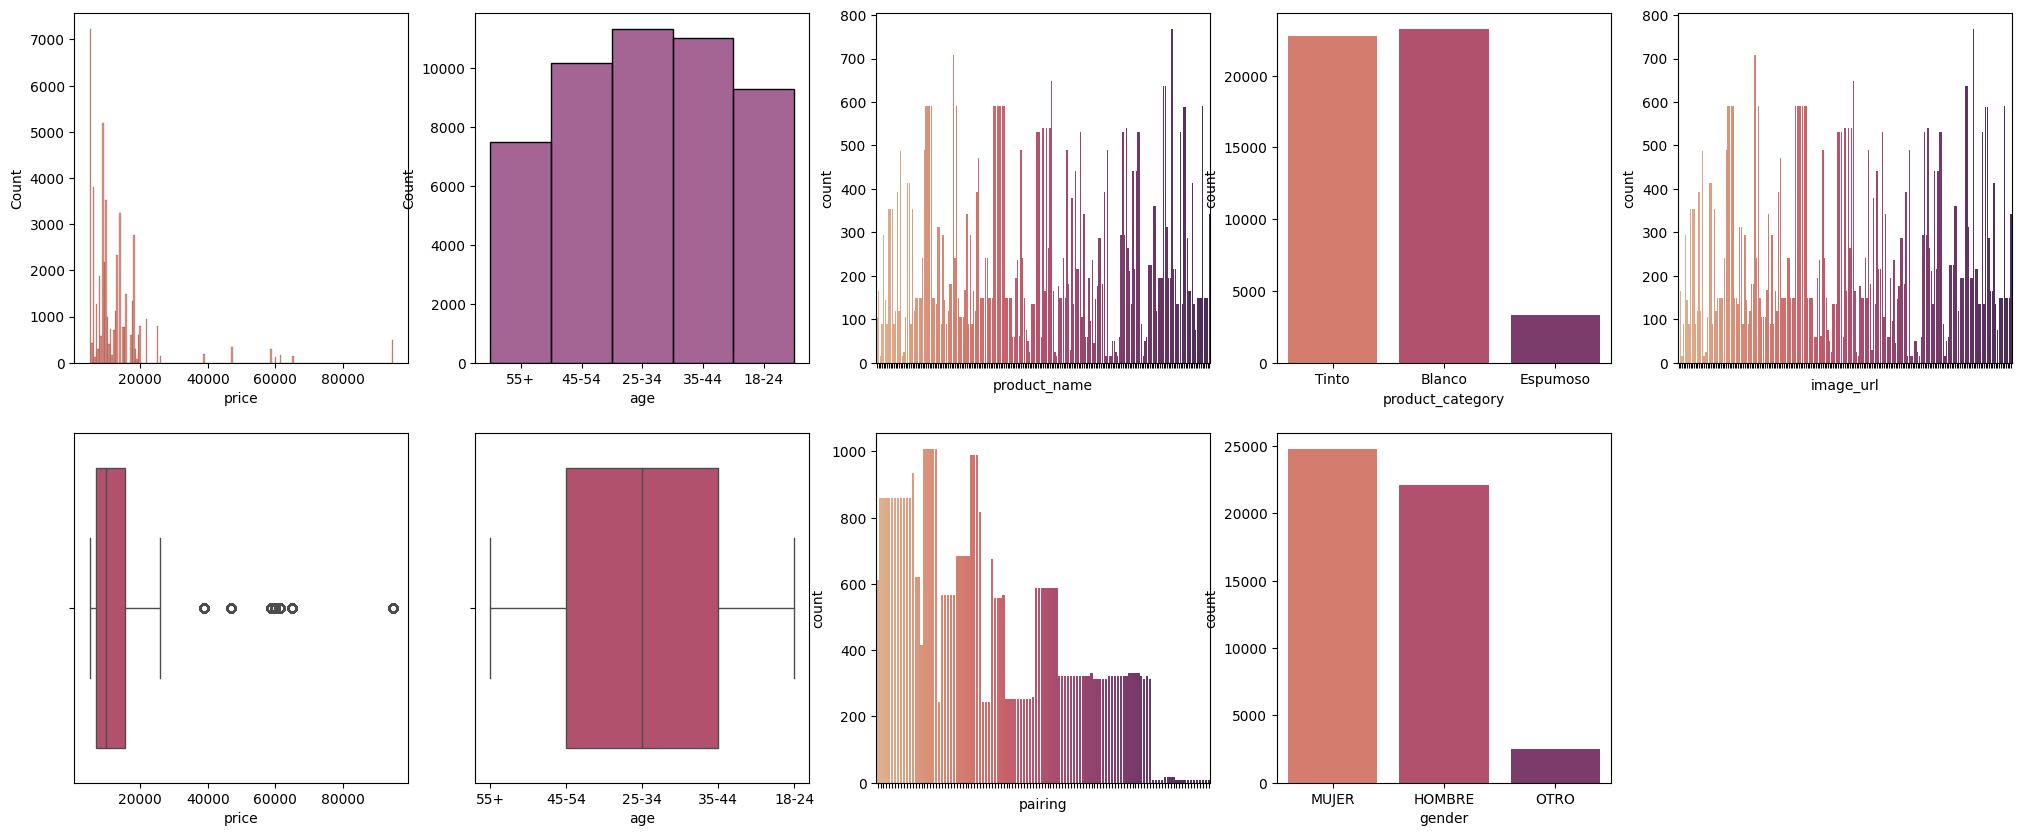

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficas comparativas de los datos
fig, ax = plt.subplots(2, 5, figsize=(25, 10))

colors = sns.color_palette("flare", 3)

sns.histplot(ax=ax[0, 0], data=pairing_df, x='price', color=colors[0])
sns.boxplot(ax=ax[1, 0], data=pairing_df, x='price', palette='flare')
sns.histplot(ax=ax[0, 1], data=pairing_df, x='age', color=colors[2])
sns.boxplot(ax=ax[1, 1], data=pairing_df, x='age', palette='flare')
sns.countplot(ax=ax[0, 2], data=pairing_df, x='product_name', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[0, 3], data=pairing_df, x='product_category', palette='flare')
sns.countplot(ax=ax[0, 4], data=pairing_df, x='image_url', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[1, 2], data=pairing_df, x='pairing', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[1, 3], data=pairing_df, x='gender', palette='flare')

fig.delaxes(ax[1,4])
plt.show()

**Información grafica:**
- Los precios poseen un sesgo hacia la izquierdad, sin embargo resulta muy dificil encontrar precios normalmente distribudos de vinos en el mercado.
- Podemos observar que los rangos de edad inician de desde la mayoría de edad en Chile, que es la edad legal para poder consumir bebidas alcoholicas. Además, se puede ver que el mayor consumo del cual se tiene información esta entre los mayores de 20 años y los 50 años, siendo la media los 40 años.
- Existe una variedad considerable de vinos para recomendar.
- Los vinos más encontrados corresponden a la categoria de Tintos y se asocian más a Mujeres.

#### **Selección de Variable y Entrenamiento**

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Codificación One-Hot para variables categóricas
one_hot_encoder = OneHotEncoder(sparse=False)
categorical_columns = ['product_category', 'gender', 'age']
pairing_encoded_df = pd.DataFrame(one_hot_encoder.fit_transform(pairing_df[categorical_columns]))
pairing_encoded_df.columns = one_hot_encoder.get_feature_names_out(categorical_columns)

# Normalización de variables numéricas
scaler = MinMaxScaler()
numeric_columns = ['price']
pairing_df[numeric_columns] = scaler.fit_transform(pairing_df[numeric_columns])

# Combinar las columnas codificadas y normalizadas
pairing_df = pd.concat([pairing_df, pairing_encoded_df], axis=1).drop(categorical_columns, axis=1)

# Limpieza final
pairing_df = pairing_df.dropna()

# Agrupar datos por nombre de producto y maridajes
pairing_agrupado_df = pairing_df.groupby('product_name')['pairing'].apply(lambda x: ', '.join(set(x))).reset_index()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
pairing_df

,product_name,price,image_url,pairing,product_category_Blanco,product_category_Espumoso,product_category_Tinto,gender_HOMBRE,gender_MUJER,gender_OTRO,age_18-24,age_25-34,age_35-44,age_45-54,age_55+
0,7 Colores Limited Edition Syrah 2020,0.144444,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7 Colores Limited Edition Syrah 2020,0.144444,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7 Colores Limited Edition Syrah 2020,0.144444,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7 Colores Limited Edition Syrah 2020,0.144444,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7 Colores Limited Edition Syrah 2020,0.144444,https://cav.cl/storage/sku_images/31010.jpg,Cheddar,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49326,Vultur Toromiro Carignan 2020,0.066667,https://cav.cl/storage/sku_images/29081.jpg,Nuez Moscada,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
49327,Vultur Toromiro Carignan 2020,0.066667,https://cav.cl/storage/sku_images/29081.jpg,Nuez Moscada,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
49328,Vultur Toromiro Carignan 2020,0.066667,https://cav.cl/storage/sku_images/29081.jpg,Nuez Moscada,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
49329,Vultur Toromiro Carignan 2020,0.066667,https://cav.cl/storage/sku_images/29081.jpg,Nuez Moscada,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separar características y etiquetas
X = pairing_df.drop(['product_name', 'pairing', 'image_url'], axis=1)  # Todas las columnas excepto la de etiquetas
y = pairing_df['product_name']  # Columna de etiquetas

# Asegúrate de que los índices en X_train correspondan a pairing_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

product_names = pairing_df['product_name']
X_train_indexed = X_train.join(product_names)

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5360291882031012


In [11]:
# Optimizar hiperparametros
from sklearn.model_selection import GridSearchCV

#Definir la grilla de parametros
param_grid = {
    'n_neighbors': [3, 6, 9, 12],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

# Buscar los mejores hiperparametros para el modelo
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print(f"Mejores parametros: {best_params}")

Mejores parametros: {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'}


In [12]:
# Iniciar el mejor modelo
best_knn = KNeighborsClassifier(algorithm='brute', n_neighbors=12, weights='uniform')

# Enternar el mejor modelo
best_knn.fit(X_train, y_train)

# hacer predicciones con el mejor modelo
y_pred = best_knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy}")

Improved Accuracy: 0.5433262389784129


In [13]:
import joblib

# Guardamos los modelos
joblib.dump(knn, "../models_final/knn.pkl")
joblib.dump(best_knn, "../models_final/best_knn.pkl")

['../models_fidel/best_knn.pkl']